# Building Feedforward neural network model for Boston housing Price

# importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data from keras

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
# take a look at the data

print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_targets[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


# Preparing the data
We are going to do a feature normalization . Feature normalizaion is when you subtract the mean of the feature from each feature and divide each result by the standard deviation.

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# Note that the quantities used for normalizing the test data are computed using the
# training data. You should never use in your workflow any quantity computed on the
# test data, even for something as simple as data normalization.

# Building the network

In [5]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

# K-fold validation

In [6]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=16,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [7]:
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

all_scores : [2.049351930618286, 2.570918321609497, 2.4256536960601807, 2.333864688873291]
mean all scores : 2.3449471592903137


#  Fit a neural network model with 2 hidden layers, each with 64 hidden units, and 200 epochs.
#Make a plot of validation MAE against epoch.

In [8]:
model = build_model()
hist = model.fit(train_data, train_targets, epochs=200, batch_size=16, verbose=2, validation_data=(test_data, test_targets))
#test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/200
26/26 - 0s - loss: 499.7886 - mae: 20.3343 - val_loss: 436.3716 - val_mae: 18.7799 - 379ms/epoch - 15ms/step
Epoch 2/200
26/26 - 0s - loss: 332.2613 - mae: 15.9145 - val_loss: 251.7042 - val_mae: 13.8493 - 45ms/epoch - 2ms/step
Epoch 3/200
26/26 - 0s - loss: 164.9370 - mae: 10.5233 - val_loss: 105.6065 - val_mae: 8.4807 - 47ms/epoch - 2ms/step
Epoch 4/200
26/26 - 0s - loss: 65.9811 - mae: 6.1235 - val_loss: 51.5969 - val_mae: 5.6509 - 46ms/epoch - 2ms/step
Epoch 5/200
26/26 - 0s - loss: 35.8778 - mae: 4.4693 - val_loss: 33.6736 - val_mae: 4.6411 - 41ms/epoch - 2ms/step
Epoch 6/200
26/26 - 0s - loss: 25.0509 - mae: 3.6189 - val_loss: 27.0070 - val_mae: 4.0898 - 47ms/epoch - 2ms/step
Epoch 7/200
26/26 - 0s - loss: 21.1699 - mae: 3.3110 - val_loss: 24.0892 - val_mae: 3.7599 - 49ms/epoch - 2ms/step
Epoch 8/200
26/26 - 0s - loss: 19.0670 - mae: 3.0614 - val_loss: 24.3556 - val_mae: 3.7328 - 46ms/epoch - 2ms/step
Epoch 9/200
26/26 - 0s - loss: 17.3945 - mae: 2.9309 - val_loss: 22

26/26 - 0s - loss: 6.5913 - mae: 1.8235 - val_loss: 18.2777 - val_mae: 2.7302 - 44ms/epoch - 2ms/step
Epoch 73/200
26/26 - 0s - loss: 6.5826 - mae: 1.7842 - val_loss: 18.2866 - val_mae: 2.6050 - 41ms/epoch - 2ms/step
Epoch 74/200
26/26 - 0s - loss: 6.3973 - mae: 1.7930 - val_loss: 18.7278 - val_mae: 2.7925 - 45ms/epoch - 2ms/step
Epoch 75/200
26/26 - 0s - loss: 6.3643 - mae: 1.8074 - val_loss: 17.4070 - val_mae: 2.5187 - 44ms/epoch - 2ms/step
Epoch 76/200
26/26 - 0s - loss: 6.4718 - mae: 1.8047 - val_loss: 18.9124 - val_mae: 2.6289 - 44ms/epoch - 2ms/step
Epoch 77/200
26/26 - 0s - loss: 6.3810 - mae: 1.7700 - val_loss: 18.0317 - val_mae: 2.6084 - 46ms/epoch - 2ms/step
Epoch 78/200
26/26 - 0s - loss: 6.2055 - mae: 1.7529 - val_loss: 19.5434 - val_mae: 2.6749 - 46ms/epoch - 2ms/step
Epoch 79/200
26/26 - 0s - loss: 6.4295 - mae: 1.7729 - val_loss: 17.7290 - val_mae: 2.4973 - 45ms/epoch - 2ms/step
Epoch 80/200
26/26 - 0s - loss: 6.2002 - mae: 1.7469 - val_loss: 18.0085 - val_mae: 2.8259 - 

Epoch 143/200
26/26 - 0s - loss: 4.1126 - mae: 1.4389 - val_loss: 17.4523 - val_mae: 2.7893 - 49ms/epoch - 2ms/step
Epoch 144/200
26/26 - 0s - loss: 3.9447 - mae: 1.4195 - val_loss: 16.6030 - val_mae: 2.6602 - 47ms/epoch - 2ms/step
Epoch 145/200
26/26 - 0s - loss: 3.9839 - mae: 1.4019 - val_loss: 15.3772 - val_mae: 2.4410 - 45ms/epoch - 2ms/step
Epoch 146/200
26/26 - 0s - loss: 3.8355 - mae: 1.4032 - val_loss: 15.2849 - val_mae: 2.4199 - 44ms/epoch - 2ms/step
Epoch 147/200
26/26 - 0s - loss: 4.0575 - mae: 1.4152 - val_loss: 14.4718 - val_mae: 2.3169 - 45ms/epoch - 2ms/step
Epoch 148/200
26/26 - 0s - loss: 3.9723 - mae: 1.4190 - val_loss: 15.8310 - val_mae: 2.6072 - 47ms/epoch - 2ms/step
Epoch 149/200
26/26 - 0s - loss: 3.7465 - mae: 1.3680 - val_loss: 15.7127 - val_mae: 2.5569 - 43ms/epoch - 2ms/step
Epoch 150/200
26/26 - 0s - loss: 4.0097 - mae: 1.4063 - val_loss: 16.1855 - val_mae: 2.5330 - 43ms/epoch - 2ms/step
Epoch 151/200
26/26 - 0s - loss: 3.8593 - mae: 1.3678 - val_loss: 15.441

# Plot Traing MAE

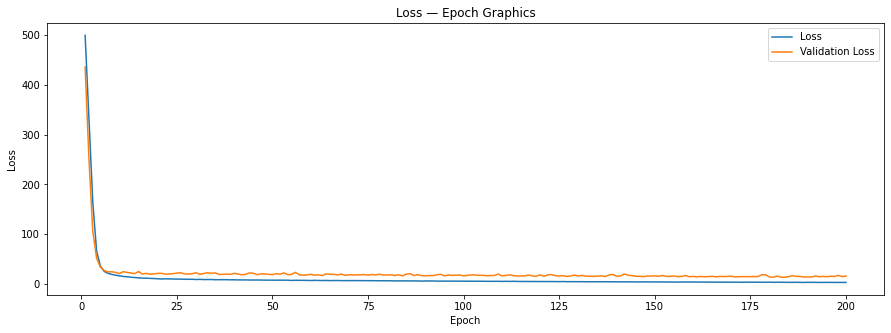

In [9]:

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()


# Plot Test/Validation MAE

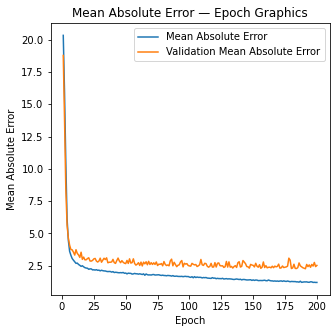

In [10]:
figure = plt.gcf()
figure.set_size_inches((5, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

# We will run 50 epochs for next model setting.

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

model = build_model()
hist = model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=2, validation_data=(test_data, test_targets))



Epoch 1/50
26/26 - 0s - loss: 492.2349 - mae: 20.0362 - val_loss: 419.9632 - val_mae: 18.1943 - 387ms/epoch - 15ms/step
Epoch 2/50
26/26 - 0s - loss: 313.2446 - mae: 15.1702 - val_loss: 236.3116 - val_mae: 13.2655 - 46ms/epoch - 2ms/step
Epoch 3/50
26/26 - 0s - loss: 151.2997 - mae: 9.6987 - val_loss: 94.2053 - val_mae: 7.8829 - 49ms/epoch - 2ms/step
Epoch 4/50
26/26 - 0s - loss: 65.5626 - mae: 6.0666 - val_loss: 52.1165 - val_mae: 5.5594 - 48ms/epoch - 2ms/step
Epoch 5/50
26/26 - 0s - loss: 40.8081 - mae: 4.7059 - val_loss: 36.1628 - val_mae: 4.6202 - 51ms/epoch - 2ms/step
Epoch 6/50
26/26 - 0s - loss: 28.4283 - mae: 3.8396 - val_loss: 27.7513 - val_mae: 4.0555 - 50ms/epoch - 2ms/step
Epoch 7/50
26/26 - 0s - loss: 21.9887 - mae: 3.3493 - val_loss: 24.5095 - val_mae: 3.7393 - 45ms/epoch - 2ms/step
Epoch 8/50
26/26 - 0s - loss: 19.3286 - mae: 3.0870 - val_loss: 21.5024 - val_mae: 3.5328 - 48ms/epoch - 2ms/step
Epoch 9/50
26/26 - 0s - loss: 16.9421 - mae: 2.9183 - val_loss: 20.0215 - val


# Fit a neural network model with 1 hidden layer with 128 units. Report its validation MAE

In [12]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
    #model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

model = build_model()
hist = model.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=2, validation_data=(test_data, test_targets))


# Answer is val_mae: 2.5094

Epoch 1/50
26/26 - 0s - loss: 543.8646 - mae: 21.5554 - val_loss: 533.9389 - val_mae: 21.3701 - 332ms/epoch - 13ms/step
Epoch 2/50
26/26 - 0s - loss: 478.4343 - mae: 20.0572 - val_loss: 468.2581 - val_mae: 19.8441 - 44ms/epoch - 2ms/step
Epoch 3/50
26/26 - 0s - loss: 412.4109 - mae: 18.4278 - val_loss: 397.6435 - val_mae: 18.0523 - 47ms/epoch - 2ms/step
Epoch 4/50
26/26 - 0s - loss: 343.1249 - mae: 16.5626 - val_loss: 323.9099 - val_mae: 16.0004 - 45ms/epoch - 2ms/step
Epoch 5/50
26/26 - 0s - loss: 274.5930 - mae: 14.4994 - val_loss: 258.1489 - val_mae: 13.9017 - 48ms/epoch - 2ms/step
Epoch 6/50
26/26 - 0s - loss: 213.3871 - mae: 12.3417 - val_loss: 196.7680 - val_mae: 11.9105 - 48ms/epoch - 2ms/step
Epoch 7/50
26/26 - 0s - loss: 160.5666 - mae: 10.2356 - val_loss: 150.3824 - val_mae: 10.3223 - 42ms/epoch - 2ms/step
Epoch 8/50
26/26 - 0s - loss: 119.9548 - mae: 8.4859 - val_loss: 111.2429 - val_mae: 8.7003 - 44ms/epoch - 2ms/step
Epoch 9/50
26/26 - 0s - loss: 89.8493 - mae: 7.1247 - va

# Add L2 weight regularization to the model with 2 hidden layers, each with 64 hidden units. Report its validation MAE

In [13]:
import tensorflow as tf
from tensorflow import keras

model1 = keras.models.Sequential([
  keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],), kernel_regularizer=keras.regularizers.l2()),
  keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2()),
  keras.layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mae', metrics=['mae'])
hist = model1.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=2, validation_data=(test_data, test_targets))


# Answer is val_mae: val_mae: 2.4876

Epoch 1/50
26/26 - 0s - loss: 22.5852 - mae: 21.7554 - val_loss: 22.0716 - val_mae: 21.2690 - 415ms/epoch - 16ms/step
Epoch 2/50
26/26 - 0s - loss: 20.0238 - mae: 19.2270 - val_loss: 18.5928 - val_mae: 17.7891 - 42ms/epoch - 2ms/step
Epoch 3/50
26/26 - 0s - loss: 15.3309 - mae: 14.5001 - val_loss: 12.5825 - val_mae: 11.7122 - 43ms/epoch - 2ms/step
Epoch 4/50
26/26 - 0s - loss: 8.9614 - mae: 8.0588 - val_loss: 7.5992 - val_mae: 6.6656 - 46ms/epoch - 2ms/step
Epoch 5/50
26/26 - 0s - loss: 6.0724 - mae: 5.1498 - val_loss: 6.0376 - val_mae: 5.1293 - 46ms/epoch - 2ms/step
Epoch 6/50
26/26 - 0s - loss: 4.8951 - mae: 3.9976 - val_loss: 5.2681 - val_mae: 4.3796 - 50ms/epoch - 2ms/step
Epoch 7/50
26/26 - 0s - loss: 4.4063 - mae: 3.5327 - val_loss: 4.8647 - val_mae: 4.0049 - 47ms/epoch - 2ms/step
Epoch 8/50
26/26 - 0s - loss: 4.1266 - mae: 3.2769 - val_loss: 4.6159 - val_mae: 3.7747 - 46ms/epoch - 2ms/step
Epoch 9/50
26/26 - 0s - loss: 3.8895 - mae: 3.0589 - val_loss: 4.4394 - val_mae: 3.6090 - 

# Add L2 weight regularization to the model with 1 hidden layers with 128 hidden units. Report its validation MAE

In [14]:
model2 = keras.models.Sequential([
  keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(train_data.shape[1],), kernel_regularizer=keras.regularizers.l2()),
  keras.layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mae', metrics=['mae'])
hist = model1.fit(train_data, train_targets, epochs=50, batch_size=16, verbose=2, validation_data=(test_data, test_targets))

# Answer is val_mae: 2.3026

Epoch 1/50
26/26 - 0s - loss: 2.4567 - mae: 1.9147 - val_loss: 3.2446 - val_mae: 2.7099 - 350ms/epoch - 13ms/step
Epoch 2/50
26/26 - 0s - loss: 2.4157 - mae: 1.8776 - val_loss: 3.1279 - val_mae: 2.5923 - 47ms/epoch - 2ms/step
Epoch 3/50
26/26 - 0s - loss: 2.4080 - mae: 1.8745 - val_loss: 3.2374 - val_mae: 2.7061 - 46ms/epoch - 2ms/step
Epoch 4/50
26/26 - 0s - loss: 2.3893 - mae: 1.8611 - val_loss: 3.1272 - val_mae: 2.5972 - 48ms/epoch - 2ms/step
Epoch 5/50
26/26 - 0s - loss: 2.3805 - mae: 1.8542 - val_loss: 3.2828 - val_mae: 2.7618 - 47ms/epoch - 2ms/step
Epoch 6/50
26/26 - 0s - loss: 2.3720 - mae: 1.8499 - val_loss: 3.1537 - val_mae: 2.6345 - 45ms/epoch - 2ms/step
Epoch 7/50
26/26 - 0s - loss: 2.3381 - mae: 1.8178 - val_loss: 3.3227 - val_mae: 2.8048 - 48ms/epoch - 2ms/step
Epoch 8/50
26/26 - 0s - loss: 2.3659 - mae: 1.8477 - val_loss: 3.1324 - val_mae: 2.6132 - 45ms/epoch - 2ms/step
Epoch 9/50
26/26 - 0s - loss: 2.3274 - mae: 1.8114 - val_loss: 3.1339 - val_mae: 2.6200 - 49ms/epoch -